In [240]:
# img_directory = '/home/ec2-user/img_align_celeba'
# img_directory = '/Users/rwilliams/Desktop/celeba/training'
celeba_directory = '/home/ec2-user/img_align_celeba'
img_directory = '/home/ec2-user/autoencoder-vaegan/colbert'
model_save_path = '/home/ec2-user/vae-colbert.ckpt'
batch_size = 64
training_set_size = 3326
img_size = 128

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
from utils import imshow, resize_crop, load_img
%matplotlib inline

In [3]:
# load training data
training = np.array([resize_crop(load_img(i+1, img_directory), (img_size, img_size)) for i in range(training_set_size)])

/home/ec2-user/.conda/envs/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


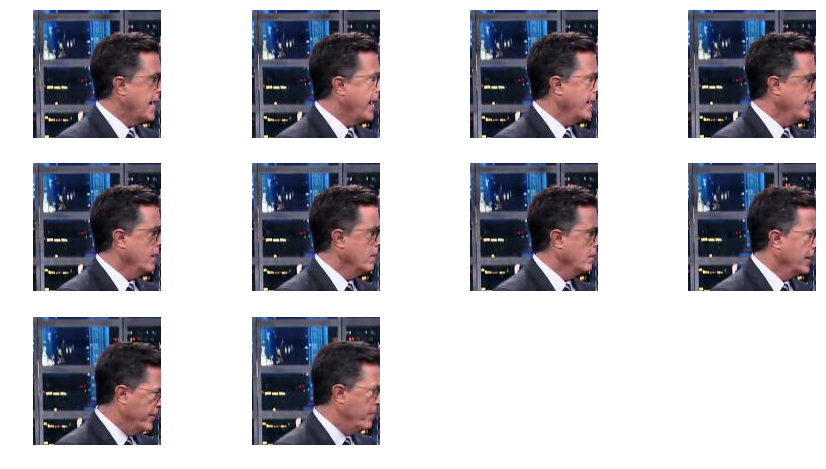

In [4]:
imshow([training[i] for i in range(100,110)])

# Create model and load weights

In [5]:
import tensorflow as tf

from autoencoder import Autoencoder
vae = Autoencoder(img_shape=(img_size, img_size, 3), batch_size=batch_size)

X = tf.placeholder(tf.float32, [None, img_size, img_size, 3])
encoder = vae.encoder(X)
decoder = vae.decoder(encoder)

latent_loss = vae.latent_loss()
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=vae.logits)
reconstruction_loss = tf.reduce_sum(xentropy)
loss = reconstruction_loss + latent_loss

optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
training_op = optimizer.minimize(loss)

saver = tf.train.Saver()

In [6]:
sess = tf.InteractiveSession()
# tf.global_variables_initializer().run()
saver.restore(sess, model_save_path)

INFO:tensorflow:Restoring parameters from /home/ec2-user/vae-colbert.ckpt


In [ ]:
import math
epochs = 10000
batches = int(float(training_set_size) / batch_size) 

for epoch in range(epochs):
    loss_out = np.zeros(batches)
    for batch in range(batches):
        feed = training[batch*batch_size:(batch+1)*batch_size]
        _, loss_out[batch] = sess.run([training_op, loss], feed_dict={X: feed})
    if (epoch % 10 == 0):
        print('saving session')
        saver.save(sess, model_save_path)

    print('loss: %s' % np.mean(loss_out))

saving session
loss: 1713109.52206
loss: 1709103.77941
loss: 1707688.03922
loss: 1706530.79902
loss: 1706069.28431
loss: 1705320.38235
loss: 1704963.90196
loss: 1704548.76716
loss: 1705342.88235
loss: 1706085.48039
saving session
loss: 1706393.92892
loss: 1706163.46569
loss: 1706668.89706
loss: 1707164.84069
loss: 1707001.57843
loss: 1706598.29657
loss: 1706037.14216
loss: 1707002.54902
loss: 1707329.44363
loss: 1713497.38235
saving session
loss: 1708685.31863
loss: 1709616.74755
loss: 1706849.21078
loss: 1705374.84314
loss: 1703737.17157
loss: 1702683.84069
loss: 1702536.51716
loss: 1702154.66667
loss: 1702010.46324
loss: 1702907.03922
saving session
loss: 1703035.22794
loss: 1704095.0049
loss: 1706887.82598
loss: 1704106.15441
loss: 1701311.21569
loss: 1698570.08333
loss: 1697630.48529
loss: 1697092.01716
loss: 1698155.5098
loss: 1697013.69363
saving session
loss: 1697386.69363
loss: 1697059.73039
loss: 1695868.49265
loss: 1696080.73284
loss: 1696292.1299
loss: 1695903.07843
loss: 16

loss: 1664584.20098
loss: 1664220.52696
loss: 1664372.20833
loss: 1664148.75
loss: 1663717.36765
loss: 1663526.25735
loss: 1663471.6201
saving session
loss: 1663284.96324
loss: 1663552.68873
loss: 1663137.99755
loss: 1663354.64706
loss: 1663126.78186
loss: 1663598.60294
loss: 1663106.20343
loss: 1662677.03431
loss: 1662612.44608
loss: 1662123.84559
saving session
loss: 1661955.21814
loss: 1661698.20833
loss: 1661470.1201
loss: 1661353.2402
loss: 1661275.08578
loss: 1661357.93873
loss: 1661426.56127
loss: 1661298.22794
loss: 1661415.51961
loss: 1661599.83088
saving session
loss: 1661744.2451
loss: 1661816.2598
loss: 1661853.57353
loss: 1661860.15931
loss: 1661814.23529
loss: 1662131.27451
loss: 1662178.82843
loss: 1662088.54167
loss: 1661871.88725
loss: 1661701.04657
saving session
loss: 1661868.46814
loss: 1662010.44608
loss: 1662096.0
loss: 1662057.15931
loss: 1662575.24755
loss: 1662375.35539
loss: 1662907.68382
loss: 1663182.8701
loss: 1663292.81618
loss: 1664070.85049
saving sessio

loss: 1654485.67647
loss: 1654618.13235
saving session
loss: 1654481.01225
loss: 1654400.10784
loss: 1654477.29412
loss: 1654484.28676
loss: 1654534.13725
loss: 1654659.00245
loss: 1654804.45098
loss: 1654932.28431
loss: 1654657.44853
loss: 1654698.84804
saving session
loss: 1654638.22794
loss: 1654452.83088
loss: 1654275.70098
loss: 1654178.97304
loss: 1654345.05637
loss: 1654198.33578
loss: 1654132.77696
loss: 1654297.88725
loss: 1654224.46814
loss: 1654523.28431
saving session
loss: 1654251.31863
loss: 1653969.29167
loss: 1653821.37745
loss: 1653595.18627
loss: 1653601.53186
loss: 1653441.64461
loss: 1653527.2598
loss: 1653772.81373
loss: 1653764.97304
loss: 1653966.16912
saving session
loss: 1653924.92892
loss: 1653922.82353
loss: 1653836.83088
loss: 1653788.15441
loss: 1653904.09069
loss: 1653628.58824
loss: 1653601.08088
loss: 1653558.79412
loss: 1653325.67157
loss: 1653238.83088
saving session
loss: 1653474.73039
loss: 1653468.03922
loss: 1653533.33578
loss: 1653437.50245
loss: 

loss: 1650236.19118
loss: 1650379.56373
loss: 1650229.25245
loss: 1650289.87255
loss: 1650343.64951
loss: 1650189.50245
loss: 1650328.72059
loss: 1650292.72304
saving session
loss: 1650242.72794
loss: 1650184.88235
loss: 1650124.35294
loss: 1650169.66912
loss: 1650109.60784
loss: 1650139.66912
loss: 1649980.47059
loss: 1650018.59314
loss: 1650027.6348
loss: 1650132.74755
saving session
loss: 1650169.67892
loss: 1650241.03431
loss: 1650242.15196
loss: 1650128.25245
loss: 1650145.46324
loss: 1650022.38235
loss: 1650010.48529
loss: 1649942.47304
loss: 1649833.48039
loss: 1649796.41667
saving session
loss: 1649835.38725
loss: 1649965.14461
loss: 1650012.97304
loss: 1650132.25
loss: 1650343.34559
loss: 1650414.65196
loss: 1650385.60294
loss: 1650272.96078
loss: 1650199.58088
loss: 1650307.01961
saving session
loss: 1650348.875
loss: 1650455.64951
loss: 1650201.35784
loss: 1650191.07353
loss: 1650436.97794
loss: 1650463.81373
loss: 1650420.08333
loss: 1650116.12745
loss: 1650114.69363
loss: 

KeyboardInterrupt: 

In [241]:
celeba = np.array([resize_crop(load_img(i+1, celeba_directory), (img_size, img_size)) for i in range(100)])

/home/ec2-user/.conda/envs/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


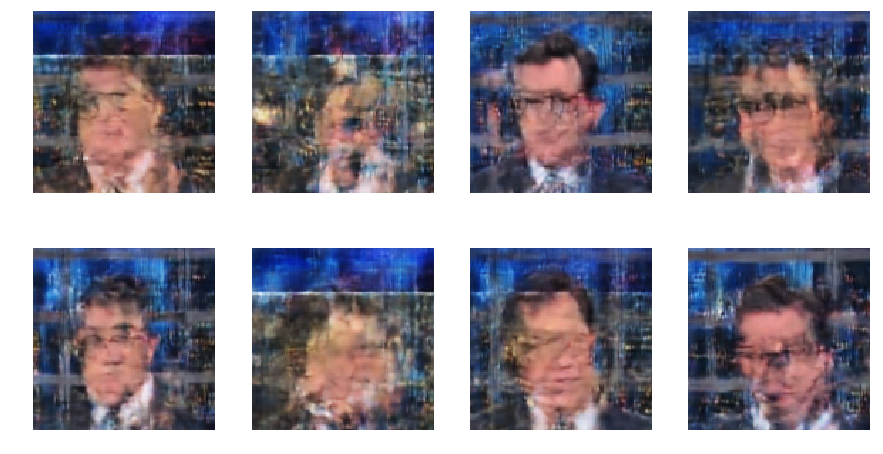

In [25]:
r = np.random.normal(size=(8,128), scale=1.0)
y = sess.run(decoder, feed_dict={encoder: r})
imshow(y[0:8])

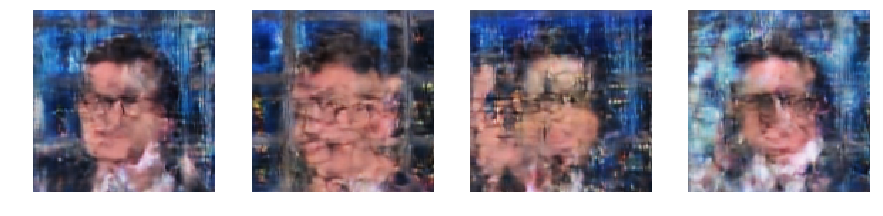

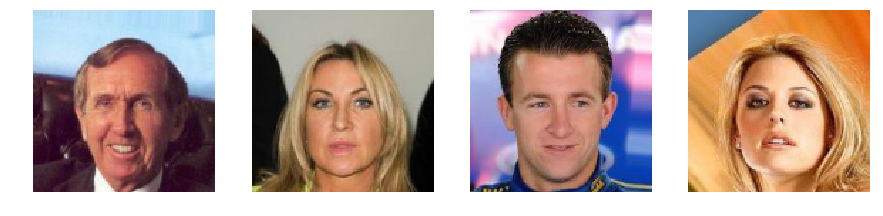

In [245]:
idx = 20
y = sess.run(decoder, feed_dict={X: celeba[idx:idx+4]})
y.shape
imshow(y[0:4])
imshow(celeba[idx:idx+4])

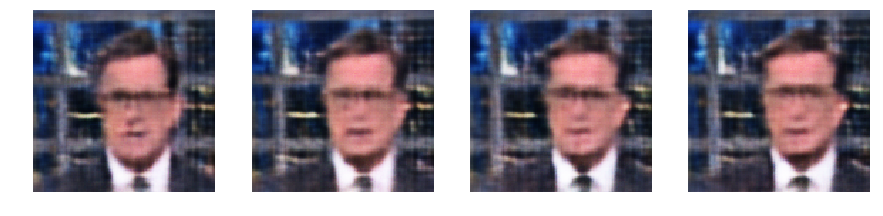

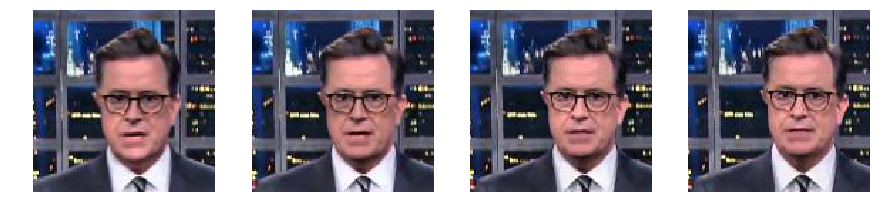

In [35]:
idx = 720
y = sess.run(decoder, feed_dict={X: training[idx:idx+4]})
y.shape
imshow(y[0:4])
imshow(training[idx:idx+4])

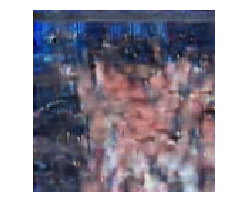

In [237]:
z = z + np.random.normal(size=(1,128), scale=1.0)
y = sess.run(decoder, feed_dict={encoder: z})
imshow([y[0]])

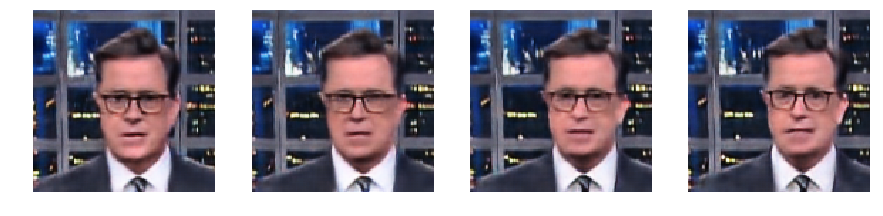

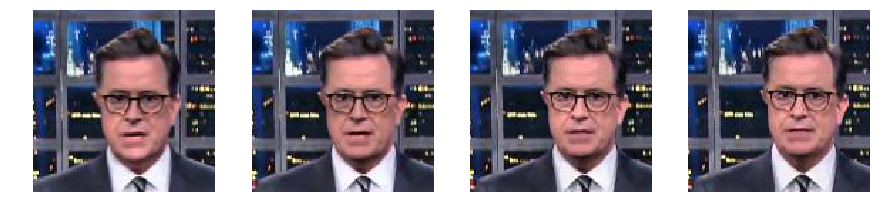

In [7]:
idx = 720
y = sess.run(decoder, feed_dict={X: training[idx:idx+4]})
y.shape
imshow(y[0:4])
imshow(training[idx:idx+4])